In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

In [2]:
df_full = pandas.read_excel('../data/GTD_0616dist/gtd_12to15_0616dist.xlsx')

In [3]:
df_2015 = df_full[df_full.iyear == 2015] 

In [84]:
top_10 = df_2015.country.value_counts()[:10].index

In [87]:
for 
df_2015.targtype1.value_counts(normalize=True)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [90]:
gb = df_full.groupby(['iyear', 'country_txt', 'targtype1_txt'], as_index=False).size()
gb.name = 'size'
gb = gb.reset_index()
gb.sort_values(['iyear', 'country_txt', 'size'], ascending=False) 

,iyear,country_txt,targtype1_txt,size
2276,2015,Yemen,Private Citizens & Property,187
2272,2015,Yemen,Military,135
2282,2015,Yemen,Violent Political Party,87
2269,2015,Yemen,Government (General),64
2278,2015,Yemen,Terrorists/Non-State Militia,41
2277,2015,Yemen,Religious Figures/Institutions,29
2270,2015,Yemen,Journalists & Media,25
2266,2015,Yemen,Business,21
2275,2015,Yemen,Police,17
2280,2015,Yemen,Unknown,16


In [104]:
by_year = gb.pivot_table('size', ['country_txt', 'targtype1_txt'], 'iyear') 
by_year['total'] = by_year.apply(lambda row: row[2012] + row[2013] + row[2014] + row[2015], axis=1)
 

iyear                                                     2012   2013   2014  \
country_txt              targtype1_txt                                         
Afghanistan              Airports & Aircraft               8.0    4.0    5.0   
                         Business                         36.0   30.0   30.0   
                         Educational Institution          24.0   26.0   25.0   
                         Food or Water Supply              3.0    NaN    1.0   
                         Government (Diplomatic)          10.0    7.0    8.0   
                         Government (General)            138.0  158.0  237.0   
                         Journalists & Media               5.0    6.0   10.0   
                         Military                        501.0  350.0  299.0   
                         NGO                               8.0   14.0   15.0   
                         Other                             2.0    NaN    5.0   
                         Police                          387.0  505.0  609.0   
                         Private Citizens & Property     251.0  226.0  354.0   
                         Religious Figures/Institutions    7.0   13.0   22.0   
                         Telecommunication                 3.0   12.0    6.0   
                         Terrorists/Non-State Militia      3.0    3.0    9.0   
                         Transportation                   10.0   13.0   11.0   
                         Unknown                          70.0   67.0  171.0   
                         Utilities                         NaN    5.0    3.0   
                         Violent Political Party           3.0    2.0    NaN   
Albania                  Business                          NaN    NaN    NaN   
                         Government (General)              NaN    1.0    1.0   
                         Police                            NaN    NaN    NaN   
                         Private Citizens & Property       NaN    NaN    1.0   
                         Transportation                    NaN    NaN    NaN   
                         Unknown                           NaN    NaN    NaN   
Algeria                  Business                          1.0    2.0    NaN   
                         Educational Institution           1.0    NaN    NaN   
                         Government (General)              1.0    3.0    2.0   
                         Journalists & Media               NaN    1.0    NaN   
                         Military                         16.0    8.0    6.0   
...                                                        ...    ...    ...   
West Bank and Gaza Strip Religious Figures/Institutions    2.0    4.0    5.0   
                         Terrorists/Non-State Militia      1.0    NaN    NaN   
                         Tourists                          NaN    NaN    NaN   
                         Transportation                    NaN    4.0    4.0   
                         Unknown                           3.0   11.0    9.0   
                         Violent Political Party           NaN    4.0    9.0   
Yemen                    Airports & Aircraft               2.0    NaN    4.0   
                         Business                          4.0   16.0   27.0   
                         Educational Institution           1.0    8.0   14.0   
                         Government (Diplomatic)           8.0   10.0    9.0   
                         Government (General)             69.0   57.0   99.0   
                         Journalists & Media               1.0    5.0   24.0   
                         Maritime                          NaN    1.0    NaN   
                         Military                        113.0  136.0  265.0   
                         NGO                               1.0    5.0    5.0   
                         Other                             NaN    NaN    1.0   
                         Police                           31.0   48.0   57.0   


In [ ]:
gb['total_size'] = gb.groupby('first_column')['size'].transform('sum')

In [81]:
df_full.groupby(['iyear', 'country_txt', 'targtype1_txt'], as_index=False).size()

iyear  country_txt               targtype1_txt                 
2012   Afghanistan               Airports & Aircraft                 8
                                 Business                           36
                                 Educational Institution            24
                                 Food or Water Supply                3
                                 Government (Diplomatic)            10
                                 Government (General)              138
                                 Journalists & Media                 5
                                 Military                          501
                                 NGO                                 8
                                 Other                               2
                                 Police                            387
                                 Private Citizens & Property       251
                                 Religious Figures/Institutions      7
             

In [17]:
df_2015.targtype1_txt

36292       Private Citizens & Property
36976    Religious Figures/Institutions
37327           Educational Institution
37328    Religious Figures/Institutions
37329      Terrorists/Non-State Militia
37330                          Business
37331       Private Citizens & Property
37332                          Business
37333                          Business
37334              Government (General)
37335       Private Citizens & Property
37336                            Police
37337                          Business
37338              Government (General)
37339       Private Citizens & Property
37340                            Police
37341                          Military
37342                            Police
37343    Religious Figures/Institutions
37344                            Police
37345       Private Citizens & Property
37346                          Military
37347                          Military
37348                          Military
37349                          Military


Iraq                                2743
Afghanistan                         1926
Pakistan                            1235
India                                882
Philippines                          717
Yemen                                668
Ukraine                              637
Nigeria                              637
Egypt                                582
Libya                                542
Syria                                485
Bangladesh                           465
Turkey                               416
Somalia                              407
Thailand                             277
West Bank and Gaza Strip             247
Sudan                                158
Democratic Republic of the Congo     141
Colombia                             135
Mali                                 120
United Kingdom                       115
Saudi Arabia                         103
Burundi                               97
Cameroon                              82
Kenya           

In [2]:
df = pandas.read_excel('../data/GTD_0616dist/gtd_12to15_0616dist.xlsx')

In [3]:
print len(df.columns)
print len (df)

137
52134


In [4]:
df['datetime'] = pandas.to_datetime((df.iyear*10000+df.imonth*100+df.iday).apply(str),format='%Y%m%d')

In [74]:
df = df[["datetime",
    "country_txt",
"region_txt",
"provstate",
"city",
"location",
"summary",
"attacktype1_txt",
"targtype1_txt",
"corp1",
"target1",
"natlty1_txt",
"motive",
"weaptype1_txt",
"weapsubtype1_txt",
"weaptype2_txt",
"weapsubtype2_txt",
"weaptype3_txt",
"weapsubtype3_txt",
"weapdetail",
"nkill",
"nkillus",
"nkillter",
"nwound",
"nwoundus",
"nwoundte"]]

In [7]:
df.to_csv('gtd_12to15_0616dist-SUBSET.csv', encoding='utf-8')

In [8]:
df.datetime.max()

Timestamp('2015-12-31 00:00:00')

In [9]:
df.country_txt.value_counts()[:20]

Iraq                        10955
Pakistan                     7247
Afghanistan                  6656
India                        3047
Nigeria                      2311
Philippines                  2212
Yemen                        2165
Somalia                      1921
Libya                        1625
Ukraine                      1541
Thailand                     1450
Egypt                        1292
Syria                        1270
Bangladesh                    752
Turkey                        737
Colombia                      628
West Bank and Gaza Strip      467
Israel                        454
United Kingdom                406
Sudan                         401
Name: country_txt, dtype: int64

In [10]:
df.country_txt.value_counts().to_csv('../data/2012-2015-country-counts.csv')

In [11]:
df.country_txt.value_counts()[:10] 

Iraq           10955
Pakistan        7247
Afghanistan     6656
India           3047
Nigeria         2311
Philippines     2212
Yemen           2165
Somalia         1921
Libya           1625
Ukraine         1541
Name: country_txt, dtype: int64

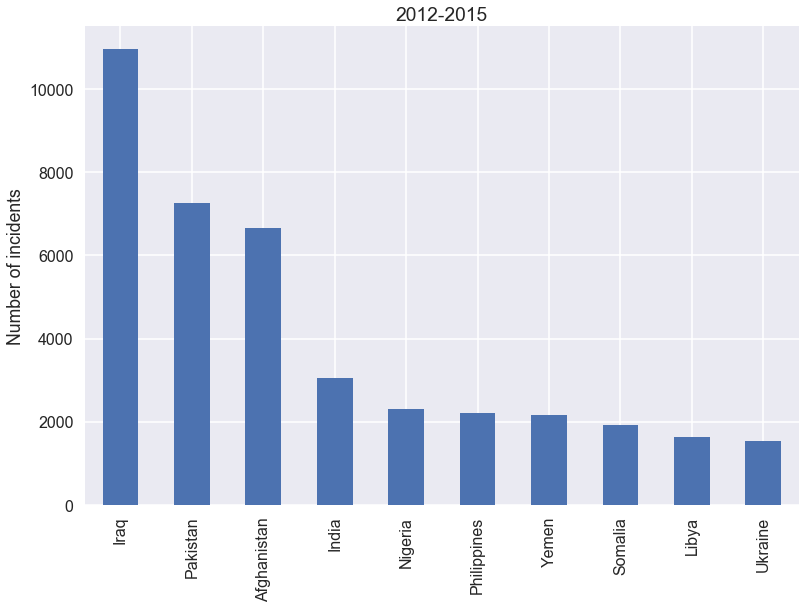

In [12]:
df.country_txt.value_counts()[:10].plot(kind='bar')
plt.title('2012-2015')
plt.ylabel('Number of incidents')

In [13]:
df[df.datetime > '2015'].country_txt.value_counts()[:10] 

Iraq           2735
Afghanistan    1920
Pakistan       1231
India           879
Philippines     717
Yemen           663
Nigeria         636
Ukraine         624
Egypt           582
Libya           541
Name: country_txt, dtype: int64

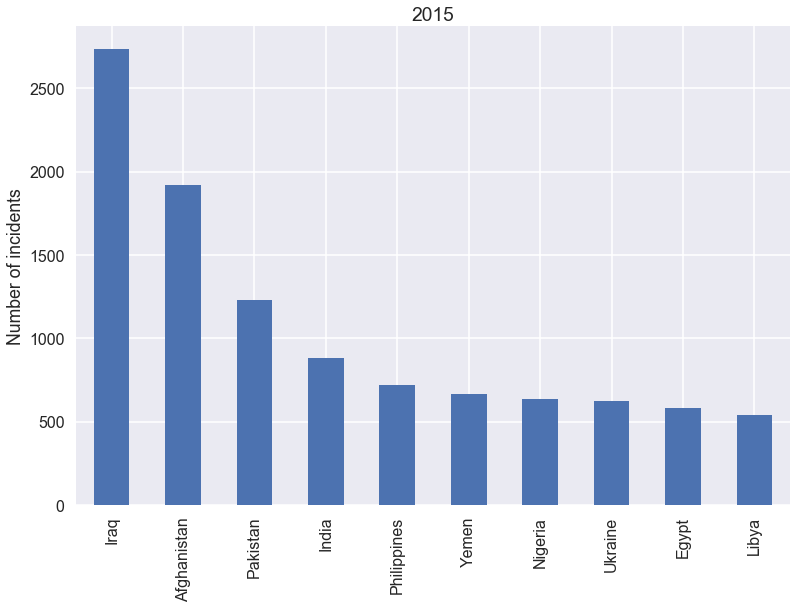

In [14]:
df[df.datetime > '2015'].country_txt.value_counts()[:10].plot(kind='bar')
plt.title('2015')
plt.ylabel('Number of incidents')

In [15]:

import matplotlib.dates as mdates 

In [16]:
df['datestring'] = df.datetime.map(lambda t: t.strftime('%Y-%m-%d')) 

2014-06-14    96
2013-10-09    89
2014-05-11    88
2014-09-27    83
2014-04-15    81
2014-01-04    80
2014-07-14    77
2014-02-20    75
2014-07-05    75
2014-05-22    75
Name: datestring, dtype: int64


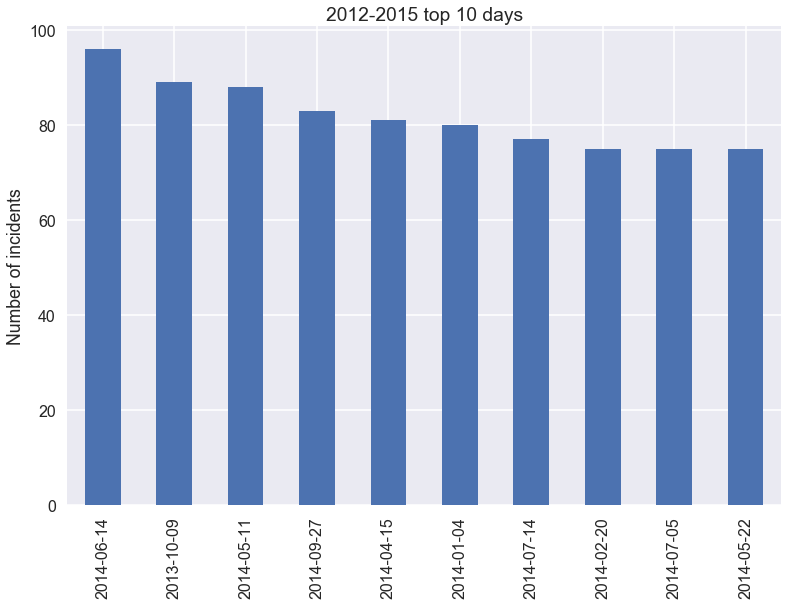

In [17]:
print df.datestring.value_counts()[:10]  
df.datestring.value_counts()[:10].plot(kind='bar')
plt.title('2012-2015 top 10 days')
plt.ylabel('Number of incidents')

In [18]:
df[df.datestring == '2014-06-14'].country_txt.value_counts()


Afghanistan    54
Pakistan       10
Iraq            8
Somalia         5
Ukraine         5
Yemen           4
India           3
Syria           2
Philippines     2
Bangladesh      1
Nigeria         1
Egypt           1
Name: country_txt, dtype: int64

2015-02-12    72
2015-01-30    71
2015-02-03    66
2015-01-25    66
2015-02-10    64
2015-04-24    64
2015-02-15    63
2015-05-03    63
2015-01-08    62
2015-01-15    62
Name: datestring, dtype: int64


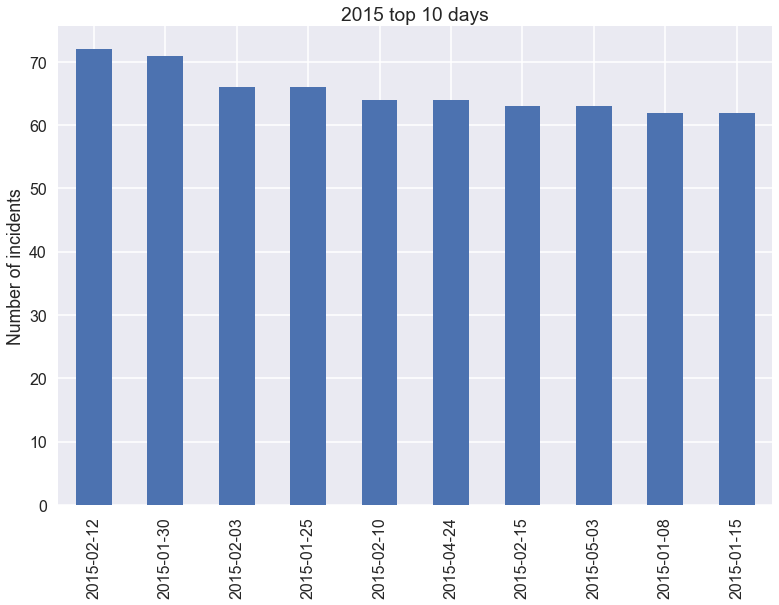

In [19]:
df[df.datetime > '2015'].datestring.value_counts()[:10].plot(kind='bar')
plt.title('2015 top 10 days')
plt.ylabel('Number of incidents')
print df[df.datetime > '2015'].datestring.value_counts()[:10]


In [20]:
df.datestring.describe()

count          52134
unique          1461
top       2014-06-14
freq              96
Name: datestring, dtype: object

In [21]:
df.datetime.value_counts().describe()

count    1461.000000
mean       35.683778
std        13.551927
min         6.000000
25%        25.000000
50%        35.000000
75%        44.000000
max        96.000000
Name: datetime, dtype: float64

In [22]:
df.datetime.value_counts().mode()

0    30
dtype: int64

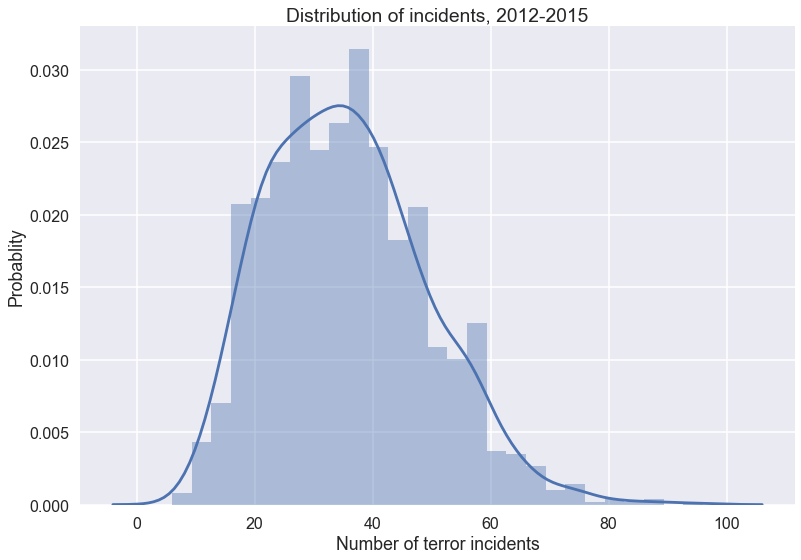

In [23]:
sns.distplot(df.datetime.value_counts())
plt.ylabel('Probablity')
plt.xlabel('Number of terror incidents')
plt.title("Distribution of incidents, 2012-2015")

## Were there any days without terror?

In [24]:
print 'MIN DATE', df.datetime.min()
print 'MAX DATE', df.datetime.max()

MIN DATE 2012-01-01 00:00:00
MAX DATE 2015-12-31 00:00:00


In [25]:
import numpy as np
from datetime import timedelta

In [26]:
timerange = np.arange(datetime(2012,1,1), datetime(2015,12,31), timedelta(days=1)).astype(datetime)

In [27]:
set(df.datetime) - set(timerange)

{Timestamp('2015-12-31 00:00:00')}

In [28]:
## redo distribution but populate days with zero incidents

In [29]:
len(df.datetime.unique())

1461

## Let's look at year-to-year variation mayble plot dist on same x-y 

In [72]:
print 2015, len(df[df.datetime > '2015']) 
print 2014, len (df[(df.datetime > '2014') & (df.datetime <= '2015')])
print 2013, len(df[(df.datetime > '2013') & (df.datetime <= '2014')])
print 2012, len(df[(df.datetime > '2012') & (df.datetime <= '2013')])

2015 14756
2014 16849
2013 12003
2012 8504


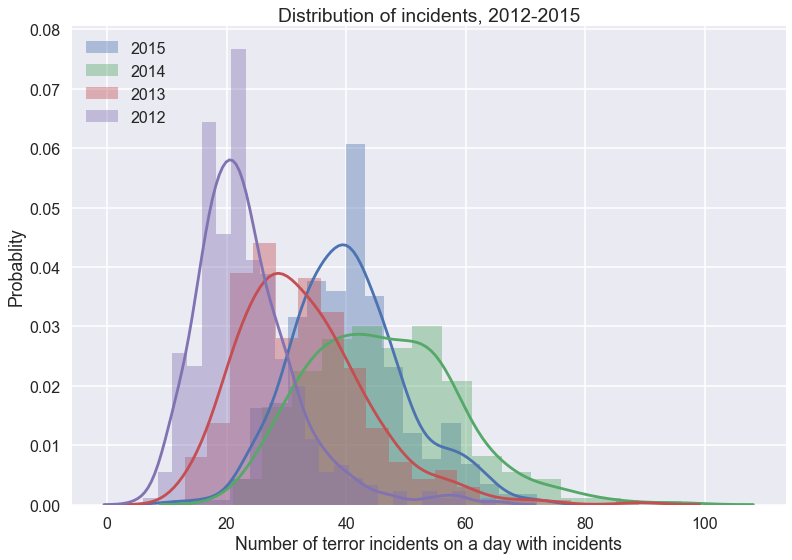

In [30]:
sns.distplot(df[df.datetime > '2015'].datetime.value_counts(), label='2015')
sns.distplot(df[(df.datetime > '2014') & (df.datetime <= '2015')].datetime.value_counts(), label='2014')
sns.distplot(df[(df.datetime > '2013') & (df.datetime <= '2014')].datetime.value_counts(), label='2013')
sns.distplot(df[(df.datetime > '2012') & (df.datetime <= '2013')].datetime.value_counts(), label='2012')

plt.legend(loc='upper left')
plt.ylabel('Probablity')
plt.xlabel('Number of terror incidents on a day with incidents')
plt.title("Distribution of incidents, 2012-2015")
 

The average number of terrorism incidents on a day with at least one incident was lowest in 2012, increased in 2013, 2014, but then decreased in 2015.


### Freq plot for 2015

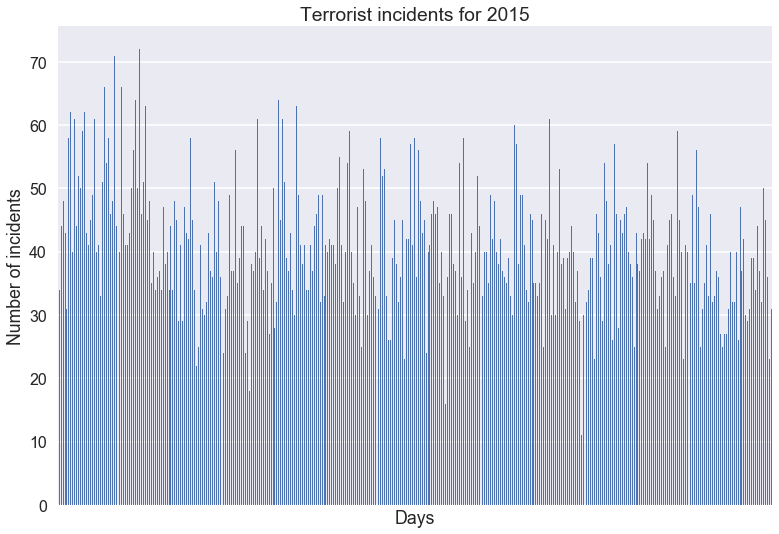

In [64]:
df[df.datetime > '2015'].datetime.value_counts().sort_index().plot(kind='bar')
plt.xticks([])
plt.title("Terrorist incidents for 2015")
plt.ylabel("Number of incidents")
plt.xlabel("Days")

In [40]:
test = df[df.datetime > '2015'].groupby([df.datetime, 'weaptype1_txt'])['datetime'].count().to_frame()

In [73]:
df[df.datetime > '2015'].groupby([df.datetime, 'weaptype1_txt'])['datetime'].count().to_csv('../data/2015-by-weapon.csv')

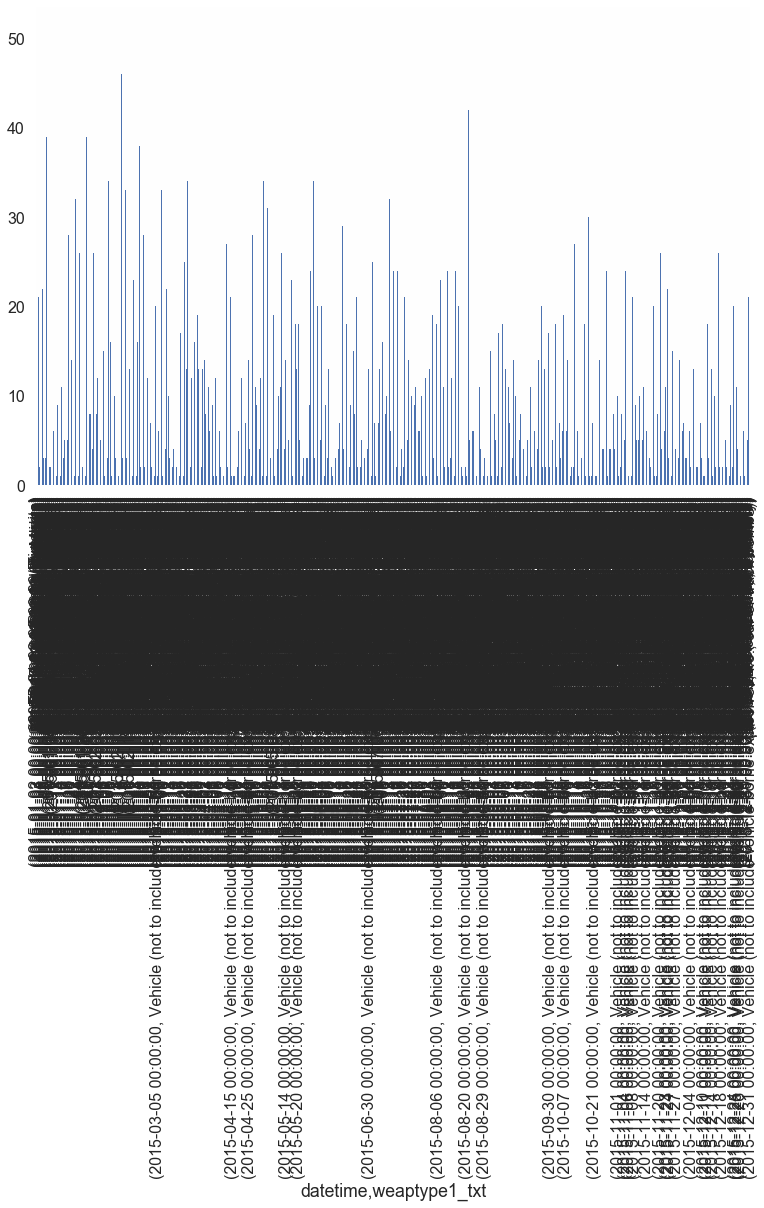

In [50]:

df[df.datetime > '2015'].groupby([df.datetime, 'weaptype1_txt'])['datetime'].count().plot(kind='bar')

In [ ]:
df.pivot('datetime', 'weaptype1_txt').value.plot(kind='bar', stacked=True)

In [ ]:
df.pivot('datetime', 'weaptype1_txt')

## Most popular weapons

In [ ]:
df.weaptype1_txt.value_counts()

In [3]:
df_20

NameError: name 'df' is not defined